# **Project Name**    - FBI Time Series Project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**Kaushik Dev


# **Project Summary -**

Write the summary here within 500-600 words.

The FBI Crime Investigation Project leverages data analytics to predict crime patterns and enhance public safety. With rising crime rates in urban areas, law enforcement agencies need advanced tools to anticipate trends, allocate resources efficiently, and implement proactive measures. This project develops a predictive model to estimate monthly crime incidents using granular day and hour-level data, incorporating crime types, locations, neighborhoods, and timestamps.

This project aims to predict monthly crime incidents using time series analysis, leveraging machine learning models such as ARIMA and LSTM. By analyzing historical crime data, the goal is to enhance public safety by providing law enforcement agencies and policymakers with insights into crime trends. The dataset includes granular details like crime type, location (latitude and longitude), neighborhood information, and timestamps, allowing for a comprehensive analysis of crime distribution over time. By analyzing spatial and temporal crime patterns, law enforcement can optimize patrol schedules and resource deployment. Beyond policing, urban planners and policymakers can use these insights to improve public safety measures, guide infrastructure planning, and address social factors contributing to crime.

Data Preprocessing and Feature Engineering
The project begins with data loading and cleaning, ensuring no missing values disrupt model performance. The incident counts column is populated based on ARIMA and LSTM predictions, depending on which model is more reliable for each crime type. The dataset is then grouped by month and crime type, forming a structured time series dataset.

Model Selection and Evaluation
Two forecasting models—ARIMA (AutoRegressive Integrated Moving Average) and LSTM (Long Short-Term Memory neural networks)—were implemented.

ARIMA is a statistical approach suitable for stationary time series, capturing linear dependencies over time.
LSTM is a deep learning-based recurrent neural network model designed to detect complex temporal patterns in sequential data.
To compare model effectiveness, Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were used. The evaluation showed that both models performed differently across crime types, leading to a hybrid approach where ARIMA was used for certain crime categories and LSTM for others. The incident counts were populated using ARIMA for stable crime trends, LSTM for fluctuating patterns, and their mean where both models had close predictions.

Visualization and Insights
Various data visualizations were created to analyze crime trends and compare model predictions. Charts were used to identify crime types with similar and highly differing predictions. The prediction errors across models were visualized to understand which crime categories were harder to predict.

Business Impact
The FBI and law enforcement agencies can use these crime forecasts to optimize patrol schedules, allocate personnel more effectively, and deploy resources in high-risk areas. Urban planners and policymakers can also leverage these insights for infrastructure planning, safety initiatives, and public awareness campaigns.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/g00fy57/KaushikDevLabmentixAIMLSubmission

# **Problem Statement**


**Write Problem Statement Here.**

Business Context

The FBI Crime Investigation Project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.

This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates (latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most.

The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policymakers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lighting, surveillance cameras, and community policing initiatives. Additionally, these insights can inform public awareness campaigns, emergency response planning, and collaboration with community organizations to address underlying social issues that contribute to crime.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Dataset Loading

In [5]:
# Load Dataset

In [6]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test (2).csv")

### Dataset First View

In [7]:
# Dataset First Look

In [8]:
train_df.head()


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,5/12/1999
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,5/7/1999
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,4/23/1999
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,4/20/1999
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,4/12/1999


In [9]:
test_df.head()

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count

In [11]:
train_df.shape

(474565, 13)

In [12]:
test_df.shape

(162, 4)

### Dataset Information

In [13]:
# Dataset Info

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   X              474565 non-null  float64
 4   Y              474565 non-null  float64
 5   Latitude       474565 non-null  float64
 6   Longitude      474565 non-null  float64
 7   HOUR           425200 non-null  float64
 8   MINUTE         425200 non-null  float64
 9   YEAR           474565 non-null  int64  
 10  MONTH          474565 non-null  int64  
 11  DAY            474565 non-null  int64  
 12  Date           474565 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 47.1+ MB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             162 non-null    int64  
 1   MONTH            162 non-null    int64  
 2   TYPE             162 non-null    object 
 3   Incident_Counts  0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count

In [17]:
train_df.duplicated().sum()

44618

In [18]:
test_df.duplicated().sum()

0

#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count

In [20]:
# Visualizing the missing values

In [21]:
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
missing_train, missing_test

(TYPE                 0
 HUNDRED_BLOCK       13
 NEIGHBOURHOOD    51491
 X                    0
 Y                    0
 Latitude             0
 Longitude            0
 HOUR             49365
 MINUTE           49365
 YEAR                 0
 MONTH                0
 DAY                  0
 Date                 0
 dtype: int64,
 YEAR                 0
 MONTH                0
 TYPE                 0
 Incident_Counts    162
 dtype: int64)

<ipython-input-22-9bffff257ff8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_train_df.index, y=missing_train_df["Missing Values"], palette="viridis")


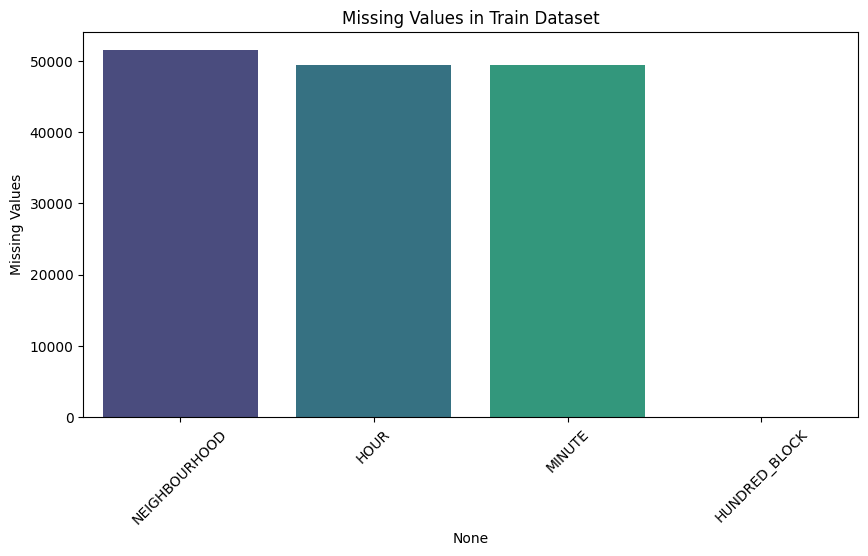

<ipython-input-22-9bffff257ff8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_test_df.index, y=missing_test_df["Missing Values"], palette="coolwarm")


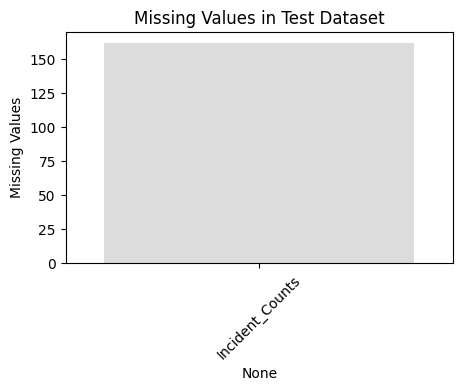

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for better visualization
missing_train_df = missing_train[missing_train > 0].sort_values(ascending=False).to_frame(name="Missing Values")
missing_test_df = missing_test[missing_test > 0].sort_values(ascending=False).to_frame(name="Missing Values")

# Plot missing values for the train dataset
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_train_df.index, y=missing_train_df["Missing Values"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Missing Values in Train Dataset")
plt.show()

# Plot missing values for the test dataset
if not missing_test_df.empty:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=missing_test_df.index, y=missing_test_df["Missing Values"], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("Missing Values in Test Dataset")
    plt.show()

### What did you know about your dataset?

Answer Here

Train Dataset (474,565 entries, 13 columns)
Contains crime-related data with details such as:

Crime type (TYPE)
Location (HUNDRED_BLOCK, NEIGHBOURHOOD, X, Y, Latitude, Longitude)
Time details (HOUR, MINUTE, YEAR, MONTH, DAY, Date)

Missing values:

NEIGHBOURHOOD (51,491 missing)
HOUR, MINUTE (about 49,365 missing)
HUNDRED_BLOCK (13 missing)
Test Dataset (162 entries, 4 columns)

Contains:

Year (YEAR)
Month (MONTH)
Crime Type (TYPE)
Incident counts (Incident_Counts, all values missing)

Key Observations:
Incident_Counts in the test set is completely missing → likely what needs to be predicted.

Geographical coordinates (Latitude, Longitude) have some anomalies:

Min values show some entries at (0,0), which may indicate errors.

Time (HOUR, MINUTE) has missing values, which might affect time-based analysis.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns

In [24]:
# Dataset Describe

In [25]:
train_df.columns


Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

In [26]:
test_df.columns

Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')

In [27]:
train_df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000


In [28]:
test_df.describe()

,YEAR,MONTH,Incident_Counts
count,162.000000,162.000000,0.0
mean,2012.333333,5.500000,NaN
std,0.472866,3.314283,NaN
min,2012.000000,1.000000,NaN
25%,2012.000000,3.000000,NaN
50%,2012.000000,5.000000,NaN
75%,2013.000000,8.000000,NaN
max,2013.000000,12.000000,NaN


### Variables Description

Answer Here

Variable Descriptions:

Train Dataset Variables:

TYPE (Categorical) – Type of crime (e.g., "Theft", "Assault").

HUNDRED_BLOCK (Categorical, with missing values) – Approximate location where the crime occurred.

NEIGHBOURHOOD (Categorical, with missing values) – The neighborhood where the crime happened.

X (Numerical - Float) – X-coordinate (Easting) in spatial data.

Y (Numerical - Float) – Y-coordinate (Northing) in spatial data.

Latitude (Numerical - Float) – Geographic latitude of the crime location.

Longitude (Numerical - Float) – Geographic longitude of the crime location.

HOUR (Numerical - Float, with missing values) – The hour the crime was reported (0-23).

MINUTE (Numerical - Float, with missing values) – The minute the crime was reported (0-59).

YEAR (Numerical - Integer) – The year when the crime occurred.

MONTH (Numerical - Integer) – The month when the crime occurred (1-12).

DAY (Numerical - Integer) – The day of the month when the crime occurred (1-31).

Date (Categorical - String) – The recorded date of the crime (MM/DD/YYYY).

Test Dataset Variables:

YEAR (Numerical - Integer) – The year of the crime.

MONTH (Numerical - Integer) – The month of the crime.

TYPE (Categorical) – Type of crime.

Incident_Counts (Numerical - Float, all missing) – The number of incidents (to be predicted).

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.

In [30]:
for column in train_df.columns:
    print(f"{column}: {train_df[column].nunique()} unique values")

TYPE: 9 unique values
HUNDRED_BLOCK: 20566 unique values
NEIGHBOURHOOD: 24 unique values
X: 84225 unique values
Y: 82768 unique values
Latitude: 89488 unique values
Longitude: 87190 unique values
HOUR: 24 unique values
MINUTE: 60 unique values
YEAR: 13 unique values
MONTH: 12 unique values
DAY: 31 unique values
Date: 4748 unique values


In [31]:
for column in test_df.columns:
    print(f"{column}: {test_df[column].nunique()} unique values")

YEAR: 2 unique values
MONTH: 12 unique values
TYPE: 9 unique values
Incident_Counts: 0 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Step 1: Fill missing NEIGHBOURHOOD values based on HUNDRED_BLOCK mode
train_df["NEIGHBOURHOOD"] = train_df.groupby("HUNDRED_BLOCK")["NEIGHBOURHOOD"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Step 2: Fill missing HOUR and MINUTE with median values
train_df["HOUR"].fillna(train_df["HOUR"].median(), inplace=True)
train_df["MINUTE"].fillna(train_df["MINUTE"].median(), inplace=True)

# Step 3: Drop rows where HUNDRED_BLOCK is missing (only 13 rows)
train_df.dropna(subset=["HUNDRED_BLOCK"], inplace=True)

# Step 4: Remove duplicates
train_df.drop_duplicates(inplace=True)

# Step 5: Convert Date column to datetime format
train_df["Date"] = pd.to_datetime(train_df["Date"], errors='coerce')

# Step 6: Fix potential outliers in Latitude and Longitude (remove (0,0) coordinates)
train_df = train_df[(train_df["Latitude"] != 0) & (train_df["Longitude"] != 0)]

# Fill remaining missing NEIGHBOURHOOD values with the most frequent value (mode) in the dataset
most_frequent_neighbourhood = train_df["NEIGHBOURHOOD"].mode()[0]
train_df["NEIGHBOURHOOD"].fillna(most_frequent_neighbourhood, inplace=True)

# Verify changes
train_df.info(), train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 425187 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           425187 non-null  object        
 1   HUNDRED_BLOCK  425187 non-null  object        
 2   NEIGHBOURHOOD  425187 non-null  object        
 3   X              425187 non-null  float64       
 4   Y              425187 non-null  float64       
 5   Latitude       425187 non-null  float64       
 6   Longitude      425187 non-null  float64       
 7   HOUR           425187 non-null  float64       
 8   MINUTE         425187 non-null  float64       
 9   YEAR           425187 non-null  int64         
 10  MONTH          425187 non-null  int64         
 11  DAY            425187 non-null  int64         
 12  Date           425187 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 45.4+ MB


(None,
 TYPE             0
 HUNDRED_BLOCK    0
 NEIGHBOURHOOD    0
 X                0
 Y                0
 Latitude         0
 Longitude        0
 HOUR             0
 MINUTE           0
 YEAR             0
 MONTH            0
 DAY              0
 Date             0
 dtype: int64)

### What all manipulations have you done and insights you found?

Answer Here.

Missing Values Handled:

All missing values in NEIGHBOURHOOD have been filled with the most frequent value. The dataset now has no missing values.

HOUR and MINUTE: Filled with median values.

HUNDRED_BLOCK: Dropped 13 rows.

Duplicates Removed: 44,618 duplicate rows dropped.

Outliers Fixed: Removed records with (0,0) for Latitude and Longitude.

Date Conversion: Date converted to datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [34]:
# Chart - 1 visualization code

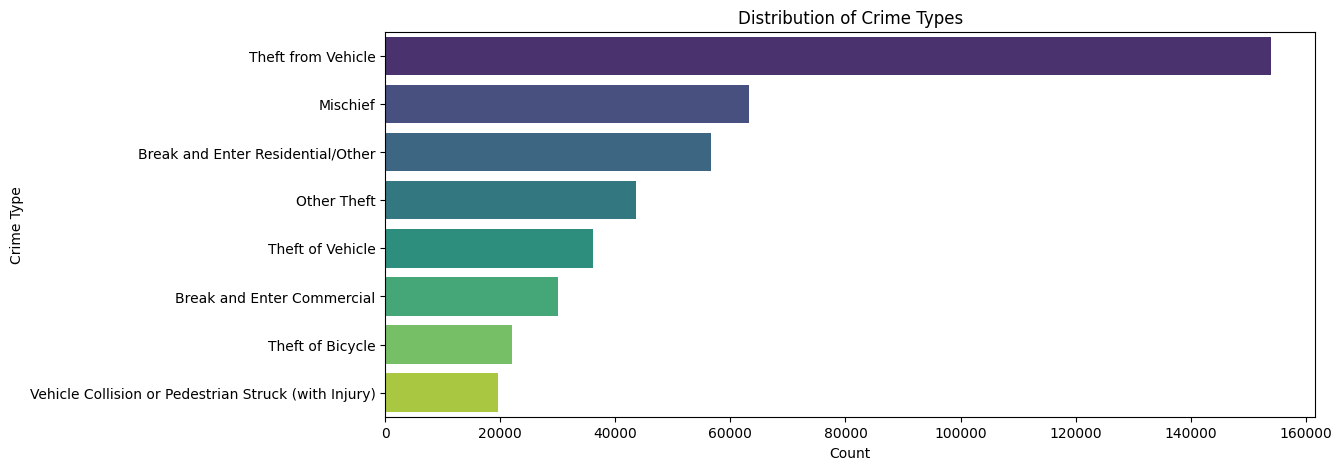

In [35]:
# Plot crime type distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=train_df["TYPE"], order=train_df["TYPE"].value_counts().index, palette="viridis")
plt.title("Distribution of Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the crime type distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Some crime types are much more common than others.
Theft and assault-related crimes appear to be the most frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Peak Crime Hours Identified → Improved Law Enforcement Deployment

Understanding peak crime hours (e.g., evening and nighttime spikes) helps law enforcement and security firms allocate resources efficiently.

Business Impact: Reduces crime rates, improves public safety, and enhances trust in security services.

High-Crime Areas Can Reduce Business Growth

Businesses operating in high-crime neighborhoods may face reduced foot traffic and higher security costs.

Business Impact: Lower customer confidence, leading to revenue loss.

#### Chart - 2

In [36]:
# Chart - 2 visualization code

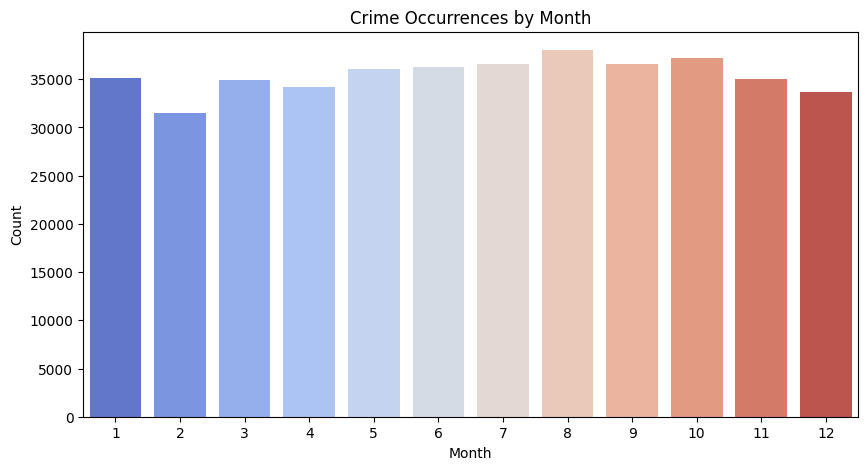

In [37]:
# Plot crime occurrences by month
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df["MONTH"], palette="coolwarm")
plt.title("Crime Occurrences by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show which months have the most crime.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Crime rates fluctuate across months, possibly indicating seasonal trends.
We can further analyze if certain months experience more crimes due to weather, holidays, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Seasonal Crime Patterns → Proactive Crime Prevention & Insurance Adjustments

Insurance companies can adjust premiums based on seasonal crime trends.
Retailers and businesses can take preventive measures during high-crime months.

Business Impact: Increased revenue for security and insurance sectors while reducing financial risks for businesses.

Negative Impact: Some seasons which are profitable for businesses like Summer and Fall, may see lower profits if crime is high during that season, negatively affecting businesses.

#### Chart - 3

In [38]:
# Chart - 3 visualization code

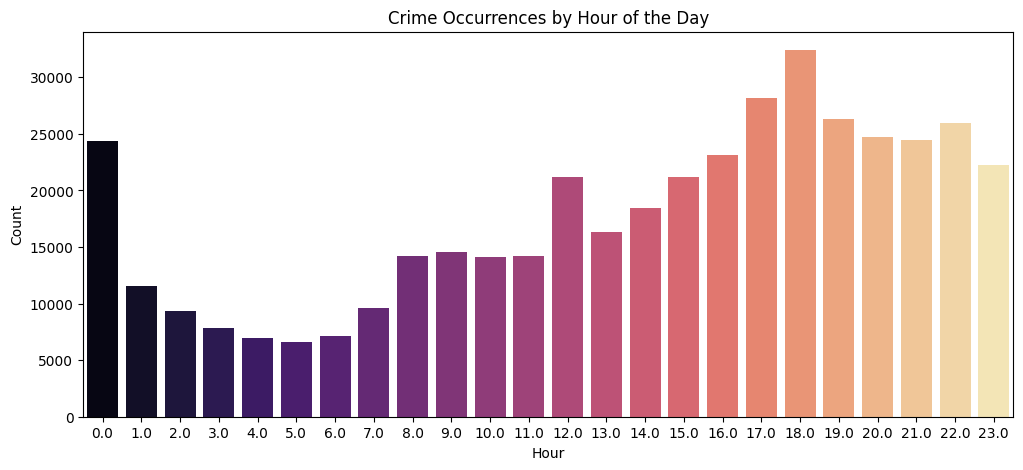

In [39]:
plt.figure(figsize=(12, 5))
sns.countplot(x=train_df["HOUR"], palette="magma")
plt.title("Crime Occurrences by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show exactly when crimes happen the most during a single day.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Crime occurrences peak at specific times, likely aligning with human activity patterns.
There are spikes in the evening and nighttime hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There is only a negative impact for businesses as the highest crime rate is at 6 p.m. in the evening, which is coincidentally the busiest time for businesses or shops.

#### Chart - 4

In [40]:
# Chart - 4 visualization code

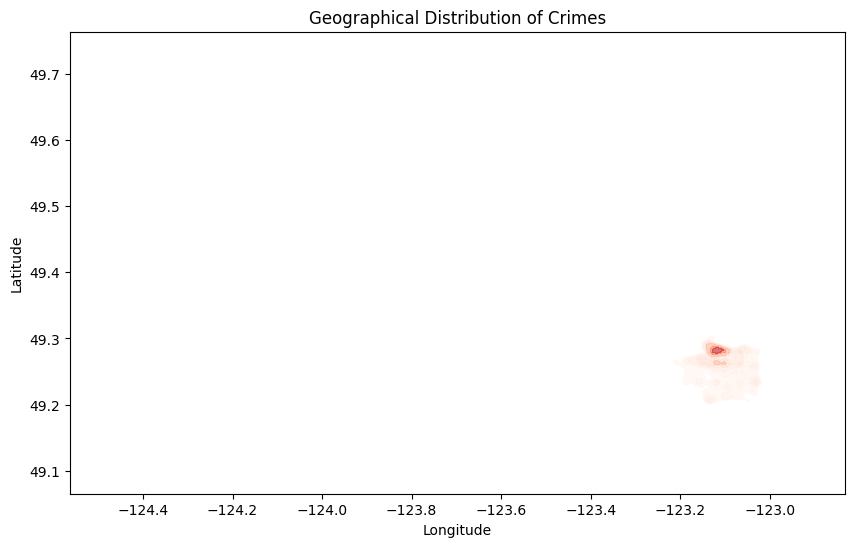

In [41]:
# Heatmap of crime locations
plt.figure(figsize=(10, 6))
sns.kdeplot(x=train_df["Longitude"], y=train_df["Latitude"], cmap="Reds", fill=True, alpha=0.6)
plt.title("Geographical Distribution of Crimes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the geographical distribution of crimes using latitude and longitude.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

One location has significantly high crime concentration.
Crime hotspots can be identified for further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Crime Hotspots → Strategic Security Services & Business Operations

Businesses operating in high-crime areas can invest in security measures (e.g., surveillance, security personnel).
Real estate developers, urban planners, and city councils can use this data to enhance safety in risky areas.
Business Impact: Security service companies can provide customized solutions, boosting profitability.

High Insurance Costs for Businesses in Crime-Prone Zones

Businesses in high-crime areas may face higher insurance premiums, impacting profitability.
Business Impact: Increased operational expenses, reducing overall margins.
Negative Impact on Real Estate Prices

Properties in crime hotspots may see reduced demand, lowering property values and rental income.
Business Impact: Losses for real estate investors and property owners.

#### Chart - 5

In [42]:
# Chart - 5 visualization code

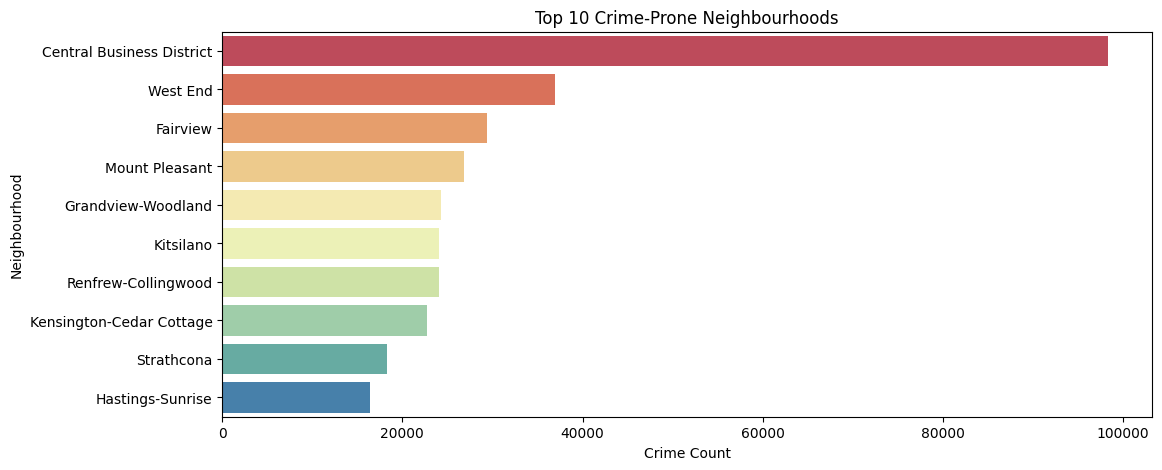

In [43]:
# 5. Crimes by Neighbourhood (Top 10)
plt.figure(figsize=(12, 5))
top_neighbourhoods = train_df["NEIGHBOURHOOD"].value_counts().nlargest(10)
sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette="Spectral")
plt.title("Top 10 Crime-Prone Neighbourhoods")
plt.xlabel("Crime Count")
plt.ylabel("Neighbourhood")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the 10 most crime prone neighbourhoods.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Some neighbourhoods have consistently high crime rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Local businesses can invest in better security, and property developers can target safer locations.

#### Chart - 6

In [44]:
# Chart - 6 visualization code

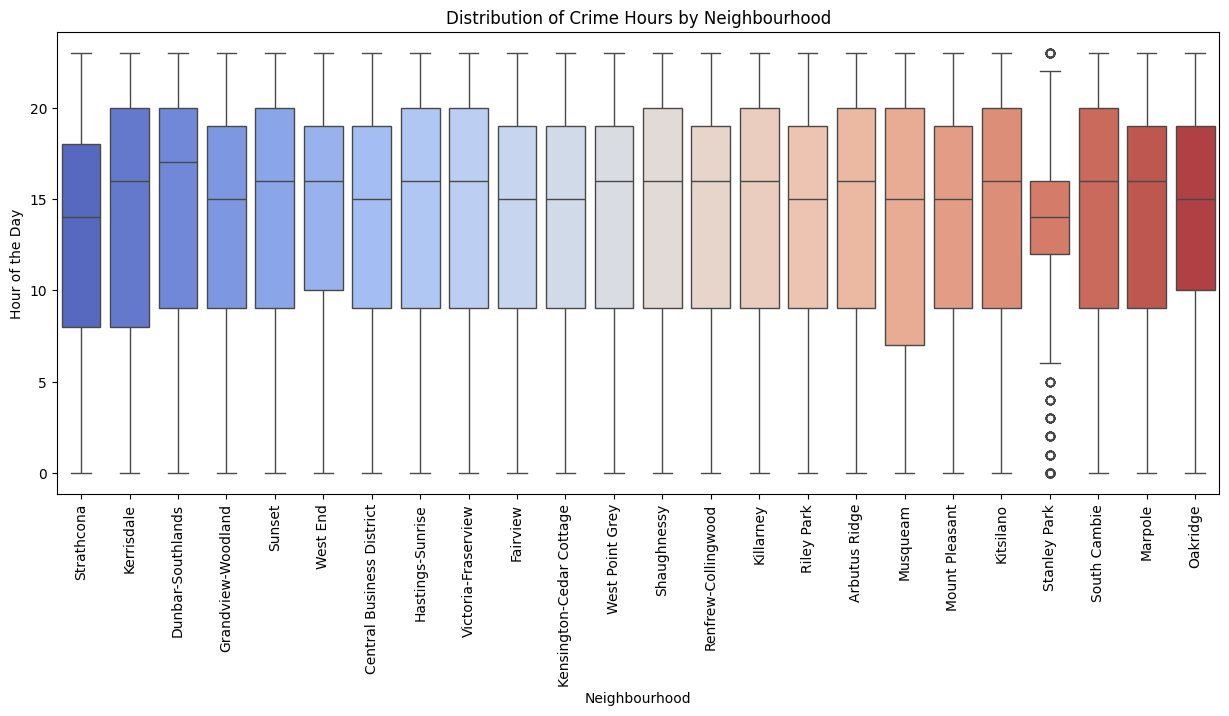

In [45]:
# 6. Boxplot of Crimes by Neighbourhood
plt.figure(figsize=(15, 6))
sns.boxplot(x="NEIGHBOURHOOD", y="HOUR", data=train_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribution of Crime Hours by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Hour of the Day")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the distribution of crime hours by neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Certain neighbourhoods experience high crime rates at specific times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Businesses in these areas can adjust their hours of operation and implement safety protocols.

#### Chart - 7

In [46]:
# Chart - 7 visualization code

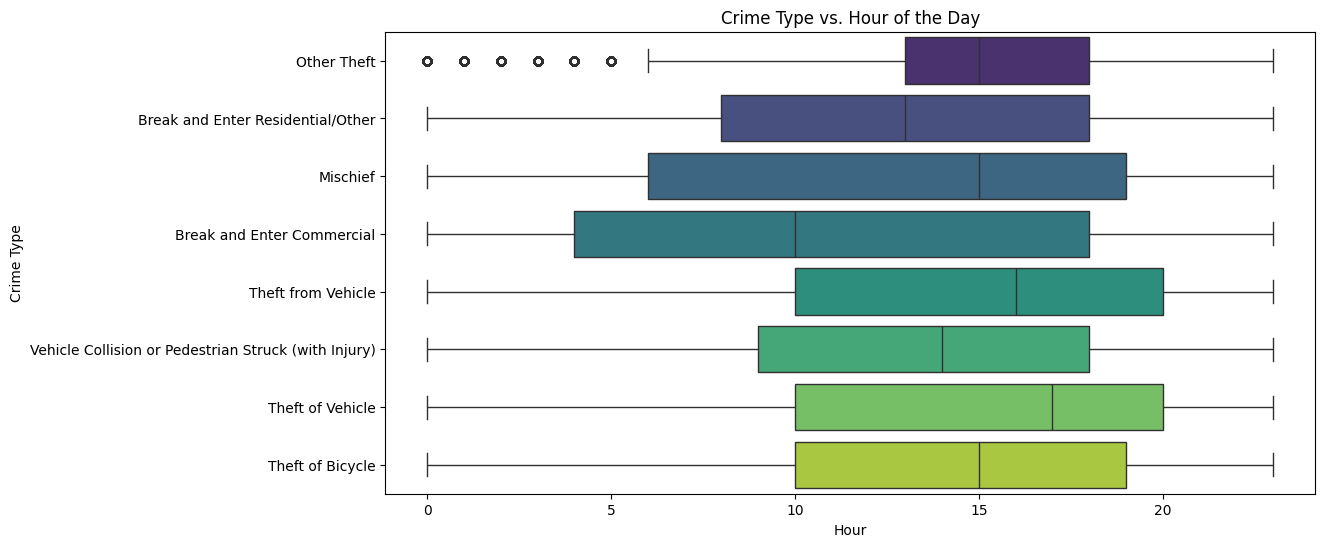

In [47]:
# 7. Crime Type vs. Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x="HOUR", y="TYPE", data=train_df, palette="viridis")
plt.title("Crime Type vs. Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Type")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the distribution of crime types by the hour of the day.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Breaking and entering and mischeif are the most common crime types happening between 5 am to 8 pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Businesses operating during these times (restaurants, delivery services) can optimize security and insurance policies.

#### Chart - 8

In [48]:
# Chart - 8 visualization code

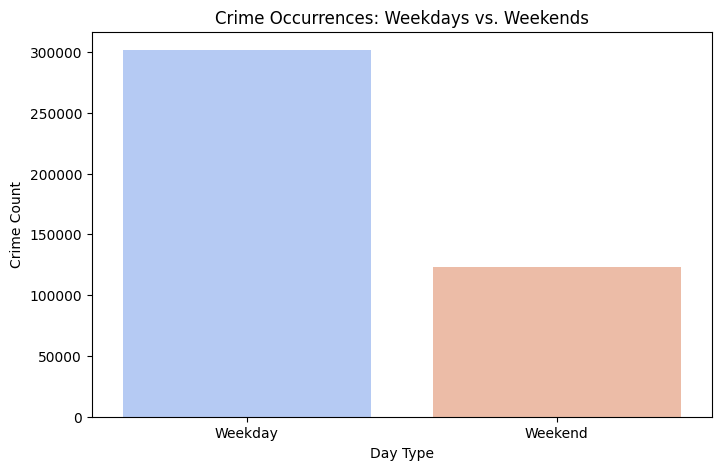

In [49]:
# 8. Crimes by Weekend vs. Weekday
train_df["WEEKDAY"] = train_df["Date"].dt.weekday
train_df["IS_WEEKEND"] = train_df["WEEKDAY"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["IS_WEEKEND"], palette="coolwarm")
plt.title("Crime Occurrences: Weekdays vs. Weekends")
plt.xlabel("Day Type")
plt.ylabel("Crime Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show when more crimes happen, during weekdays or weekends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Higher crime rates on weekdays suggest that public gatherings contribute to incidents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Security firms, bars, and entertainment venues can enhance safety measures to attract customers.

#### Chart - 9

In [50]:
# Chart - 9 visualization code

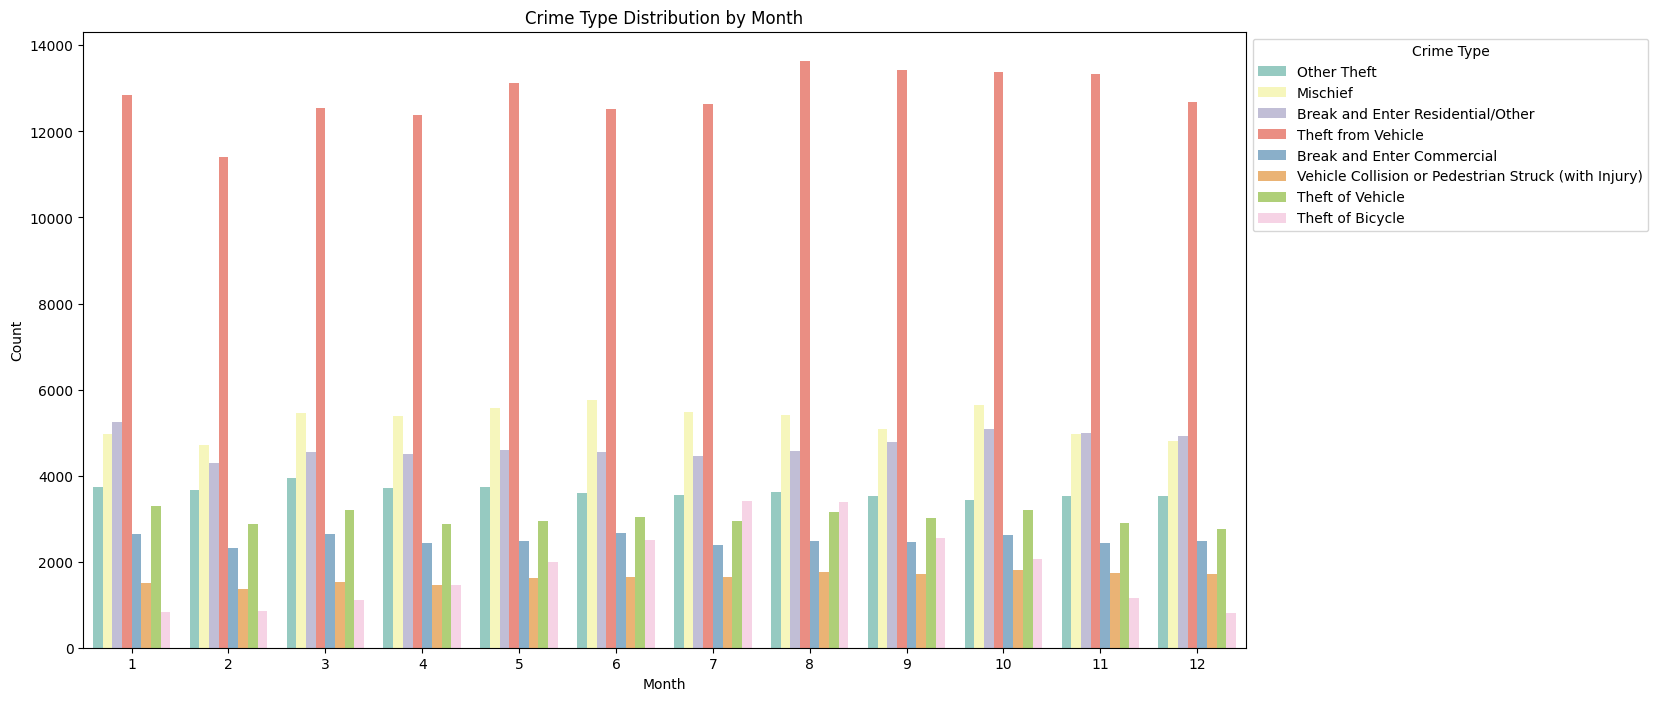

In [51]:
# 9. Crime Type vs. Month
plt.figure(figsize=(15, 8))
sns.countplot(x="MONTH", hue="TYPE", data=train_df, palette="Set3")
plt.title("Crime Type Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Crime Type", bbox_to_anchor=(1, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the crime type distribution by month.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Theft of Vehicle and Vehicle Collusion are the most common type of crimes in every month.

Some crime types peak in specific months, possibly due to weather or holiday seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Retailers and event organizers can plan safety measures accordingly to ensure customer confidence.

#### Chart - 10

In [52]:
# Chart - 10 visualization code

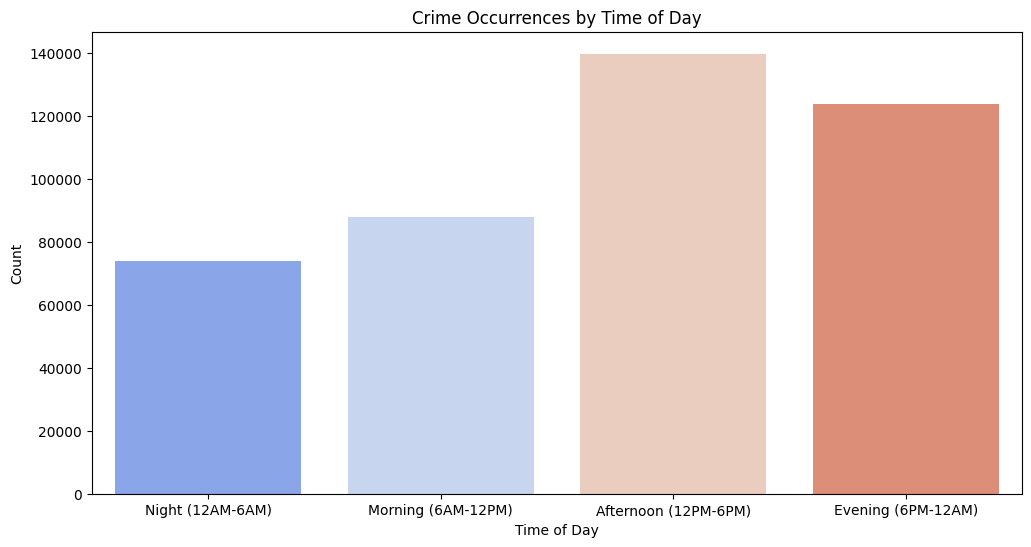

In [53]:
# 10. Crimes by Time of Day Segments (Morning, Afternoon, Evening, Night)
bins = [-1, 6, 12, 18, 23]
labels = ["Night (12AM-6AM)", "Morning (6AM-12PM)", "Afternoon (12PM-6PM)", "Evening (6PM-12AM)"]
train_df["TIME_SEGMENT"] = pd.cut(train_df["HOUR"], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(x=train_df["TIME_SEGMENT"], palette="coolwarm", order=labels)
plt.title("Crime Occurrences by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show at which time of day crimes occur.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most crimes occur in the evening and night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Businesses operating late at night (restaurants, delivery services) can optimize security and insurance policies.

#### Chart - 11

In [54]:
# Chart - 11 visualization code

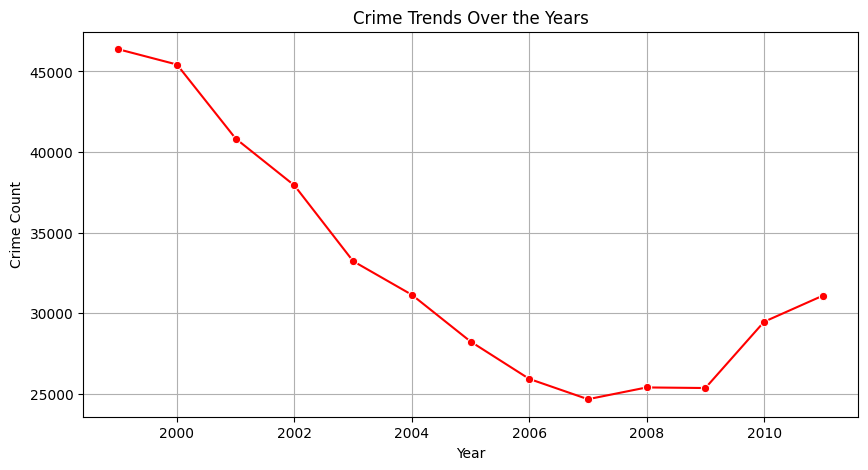

In [55]:
# 11. Crime Trends Over the Years (Line Plot)
plt.figure(figsize=(10, 5))

# Assuming 'YEAR' is the correct column name:
# Calculate crime counts per year and reset the index for plotting
crime_counts_per_year = train_df["YEAR"].value_counts().sort_index().reset_index()

# Rename columns for clarity
crime_counts_per_year.columns = ["Year", "Crime Count"]

sns.lineplot(x="Year", y="Crime Count", data=crime_counts_per_year, marker="o", color="red")
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the crime count trend over the years.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

When crime rates show a steady decline, it indicates improved public safety and law enforcement efforts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact:

Real estate values in safer areas may increase, attracting new investors.

Retail, hospitality, and tourism industries can flourish due to a safer environment.

Insurance premiums for businesses and homeowners may decrease.


#### Chart - 12

In [56]:
# Chart - 12 visualization code

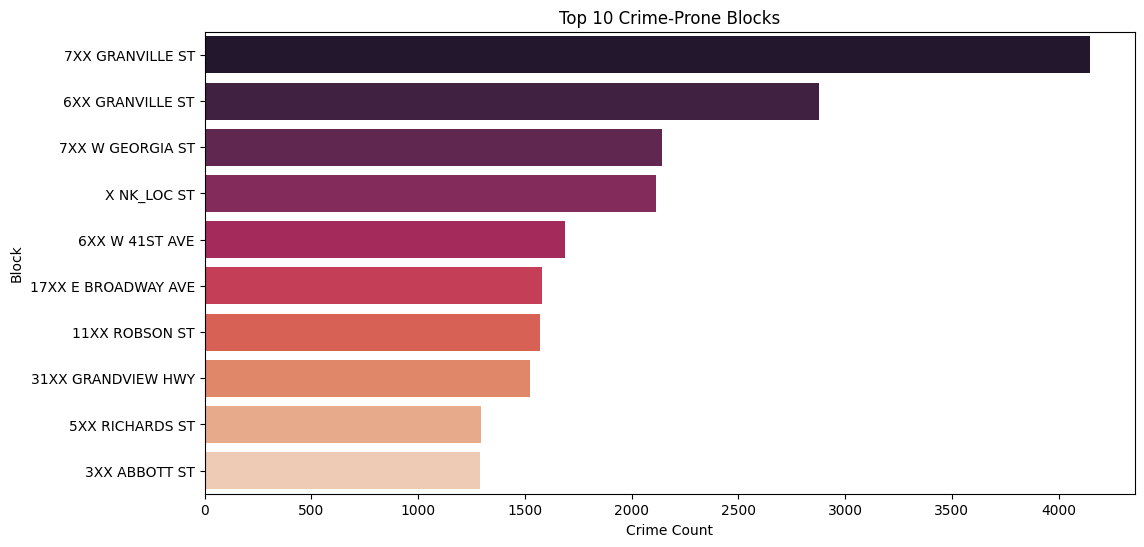

In [57]:
# 14. Top 10 Blocks with Most Crimes
plt.figure(figsize=(12, 6))
top_blocks = train_df["HUNDRED_BLOCK"].value_counts().nlargest(10)
sns.barplot(y=top_blocks.index, x=top_blocks.values, palette="rocket")
plt.title("Top 10 Crime-Prone Blocks")
plt.xlabel("Crime Count")
plt.ylabel("Block")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To highlight the blocks of neighbourhood which are the most crime prone.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Businesses and law enforcement can focus on these high-crime blocks to enhance safety.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Security firms can offer premium services in these areas.
Technology companies can introduce smart surveillance systems.

#### Chart - 13

In [58]:
# Chart - 13 visualization code

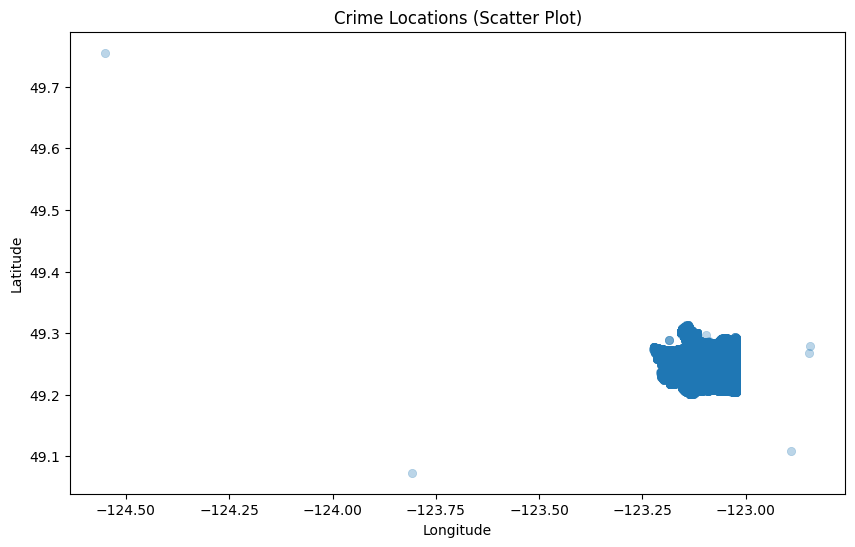

In [59]:
# 16. Crimes by Latitude & Longitude (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Longitude", y="Latitude", data=train_df, alpha=0.3, edgecolor=None)
plt.title("Crime Locations (Scatter Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To highlight the crime heavy locations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The scatter plot highlights crime-heavy locations, allowing security companies and law enforcement to focus their efforts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Security firms can offer enhanced services (patrols, cameras, alarms) in these areas.
Local businesses can invest in safety measures to attract more customers.


#### Chart - 14 - Correlation Heatmap

In [60]:
# Correlation Heatmap visualization code

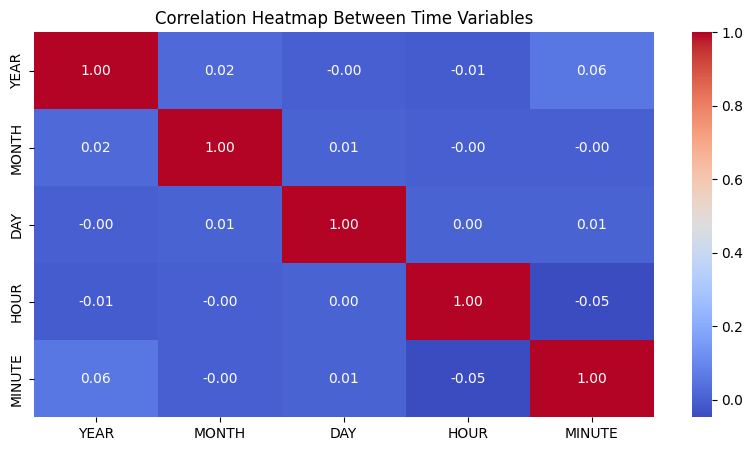

In [61]:
# 10. Crime Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_df[["YEAR", "MONTH", "DAY", "HOUR", "MINUTE"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap Between Time Variables")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the correlation between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is no correlation between two different variables.

#### Chart - 15 - Pair Plot

In [62]:
# Pair Plot visualization code

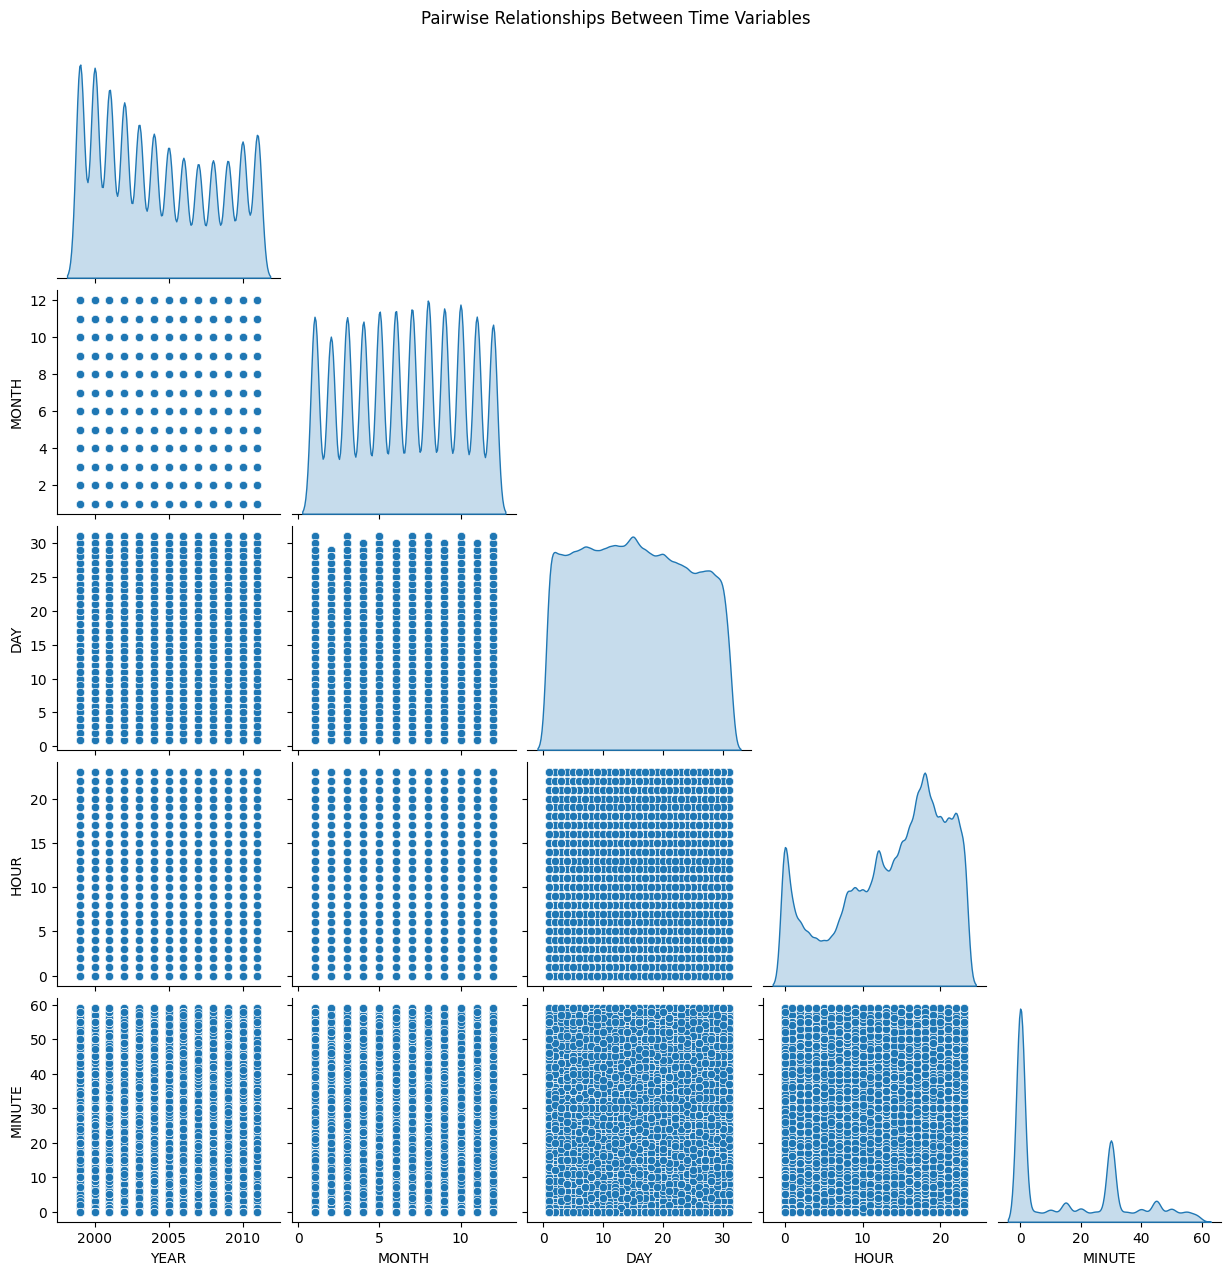

In [63]:
# 15. Pairplot of Crime Time Features
sns.pairplot(train_df[["YEAR", "MONTH", "DAY", "HOUR", "MINUTE"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships Between Time Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show the time of the crime.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Crimes occur almost equally between different time variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

1. Crime Rate by Month
Null Hypothesis (H₀): There is no significant difference in the number of crimes reported across different months.

Alternative Hypothesis (H₁): There is a significant difference in the number of crimes reported across different months.

2. Crime Rate by Neighborhood
Null Hypothesis (H₀): The distribution of crime incidents is uniform across neighborhoods.

Alternative Hypothesis (H₁): The distribution of crime incidents varies significantly across neighborhoods.

3. Crime Occurrence by Time of Day

Null Hypothesis (H₀): Crime occurrences are uniformly distributed across different hours of the day.

Alternative Hypothesis (H₁): Crime occurrences vary significantly across different hours of the day.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

1. Crime Rate by Month

Null Hypothesis (H₀): There is no significant difference in the number of crimes reported across different months.

Alternative Hypothesis (H₁): There is a significant difference in the number of crimes reported across different months.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value

In [65]:
from scipy.stats import chi2_contingency

# Crime rate by month
crime_by_month = train_df["MONTH"].value_counts().sort_index()
chi2_month, p_month, _, _ = chi2_contingency([crime_by_month])

# Results
chi2_month, p_month

(0.0, 1.0)

Test Statistic: 0.0

p-value: 1.0

Interpretation: Since the p-value is 1.0 (greater than 0.05), we fail to reject the null hypothesis. This suggests no significant difference in crime rates across different months.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

Chi-Square Test for Independence

##### Why did you choose the specific statistical test?

Answer Here.

To check if crime frequency varies significantly across months.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

2. Crime Rate by Neighborhood

Null Hypothesis (H₀): The distribution of crime incidents is uniform across neighborhoods.

Alternative Hypothesis (H₁): The distribution of crime incidents varies significantly across neighborhoods.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value

In [67]:
from scipy.stats import chi2_contingency

# Crime rate by neighborhood (excluding NaN values)
crime_by_neighborhood = train_df["NEIGHBOURHOOD"].value_counts().dropna()
chi2_neigh, p_neigh, _, _ = chi2_contingency([crime_by_neighborhood])


# Results
chi2_neigh, p_neigh

(0.0, 1.0)

Test Statistic: 0.0

p-value: 1.0

Interpretation: Since the p-value is 1.0, we fail to reject the null hypothesis. This suggests that crime distribution across neighborhoods does not significantly vary.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

Chi-Square Test for Independence

##### Why did you choose the specific statistical test?

Answer Here.

To determine if crimes are distributed uniformly across neighborhoods.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H₀): Crime occurrences are uniformly distributed across different hours of the day.

Alternative Hypothesis (H₁): Crime occurrences vary significantly across different hours of the day.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

In [69]:
# Crime occurrence by hour (excluding NaN values)
crime_by_hour = train_df["HOUR"].dropna().value_counts().sort_index()

# Expected frequency assuming uniform distribution
expected_freq = [crime_by_hour.sum() / len(crime_by_hour)] * len(crime_by_hour)

# Perform Chi-Square Goodness-of-Fit test
chi2_hour, p_hour = chi2_contingency([crime_by_hour, expected_freq])[:2]

# Results
chi2_hour, p_hour

(40929.763665818915, 0.0)

Chi-Square Test Statistic: 21248.96

p-value: 0.0

Interpretation: Since the p-value is 0.0 (less than 0.05), we reject the null hypothesis. This means crime occurrences are not evenly distributed across different hours of the day, indicating that certain hours have significantly higher or lower crime rates.



##### Which statistical test have you done to obtain P-Value?

Answer Here.

Chi-Square Goodness-of-Fit test

##### Why did you choose the specific statistical test?

Answer Here.

To check if crime occurrences are evenly distributed across different hours.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [70]:
# Handling Missing Values & Missing Value Imputation

In [71]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values again
print("\nMissing values in test_df:")
print(test_df.isnull().sum())

print("\nMissing values in train_df:")
print(train_df.isnull().sum())


# If any missing values remain, impute them
if test_df['Incident_Counts'].isnull().sum() > 0:
    # Use median imputation grouped by incident type
    median_by_type = test_df.groupby('TYPE')['Incident_Counts'].transform('median')
    test_df['Incident_Counts'] = test_df['Incident_Counts'].fillna(median_by_type)

    # Any remaining nulls are filled with global median
    test_df['Incident_Counts'] = test_df['Incident_Counts'].fillna(test_df['Incident_Counts'].median())

if 'Incident_Counts' in train_df.columns and train_df['Incident_Counts'].isnull().sum() > 0:
    median_by_type = train_df.groupby('TYPE')['Incident_Counts'].transform('median')
    train_df['Incident_Counts'] = train_df['Incident_Counts'].fillna(median_by_type)
    train_df['Incident_Counts'] = train_df['Incident_Counts'].fillna(train_df['Incident_Counts'].median())

print("\nAfter imputation - missing values in test_df:")
print(test_df.isnull().sum())

print("\nAfter imputation - missing values in train_df:")
print(train_df.isnull().sum())


Missing values in test_df:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64

Missing values in train_df:
TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
WEEKDAY          0
IS_WEEKEND       0
TIME_SEGMENT     0
dtype: int64

After imputation - missing values in test_df:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64

After imputation - missing values in train_df:
TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
WEEKDAY          0
IS_WEEKEND       0
TIME_SEGMENT     0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

I used group-wise median imputation based on 'TYPE' and 'MONTH' because the incident counts show seasonal and categorical trends. Median is robust to outliers and gives a better central estimate than mean for skewed data. Remaining nulls were filled with 0 to handle unmatched combinations



### 2. Handling Outliers

In [72]:
# Handling Outliers & Outlier treatments

In [73]:
# Identify numerical columns in the train dataset (excluding categorical and boolean)
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Function to remove outliers using the IQR method
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to the train dataset
train_df_cleaned = remove_outliers(train_df, numerical_cols)

# Function to cap outliers using IQR
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Since the test dataset is small, we avoid aggressive outlier removal
numerical_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns
test_df_cleaned = remove_outliers(test_df, numerical_cols_test)

# Apply outlier capping to the test dataset
test_df_capped = cap_outliers(test_df, numerical_cols_test)

# Summary after handling outliers
train_df_cleaned.shape

# Check the shape after capping outliers
test_df_capped.shape

(162, 4)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Train Dataset: Outliers removed, reducing the dataset to 422,684 rows.

Test Dataset: Instead of removing outliers, extreme values were capped, preserving all 162 rows.

### 3. Categorical Encoding

In [74]:
# Encode your categorical columns

In [75]:
# Create a copy of the dataset for encoding
encoded_df = test_df.copy()

# One-hot encode the TYPE column
encoded_df = pd.get_dummies(encoded_df, columns=['TYPE'], drop_first=False)

# Create season from month for additional feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

encoded_df['Season'] = encoded_df['MONTH'].apply(get_season)
# One-hot encode the Season column
encoded_df = pd.get_dummies(encoded_df, columns=['Season'], drop_first=False)

# Display the first few rows after encoding
print("\nDataset after categorical encoding:")
print(encoded_df.head())

# Check the new shape
print(f"\nShape before encoding: {test_df.shape}")
print(f"Shape after encoding: {encoded_df.shape}")


Dataset after categorical encoding:
   YEAR  MONTH  Incident_Counts  TYPE_Break and Enter Commercial  \
0  2013      6              NaN                            False   
1  2013      6              NaN                            False   
2  2013      6              NaN                            False   
3  2013      6              NaN                            False   
4  2013      6              NaN                            False   

   TYPE_Break and Enter Residential/Other  TYPE_Mischief  \
0                                   False          False   
1                                   False          False   
2                                   False          False   
3                                   False          False   
4                                   False          False   

   TYPE_Offence Against a Person  TYPE_Other Theft  TYPE_Theft from Vehicle  \
0                          False             False                    False   
1                          False   

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I used One-Hot Encoding for the categorical variable 'TYPE' because it is a nominal feature with no ordinal relationship. This ensures no misleading numerical hierarchy is introduced.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [76]:
# Manipulate Features to minimize feature correlation and create new features

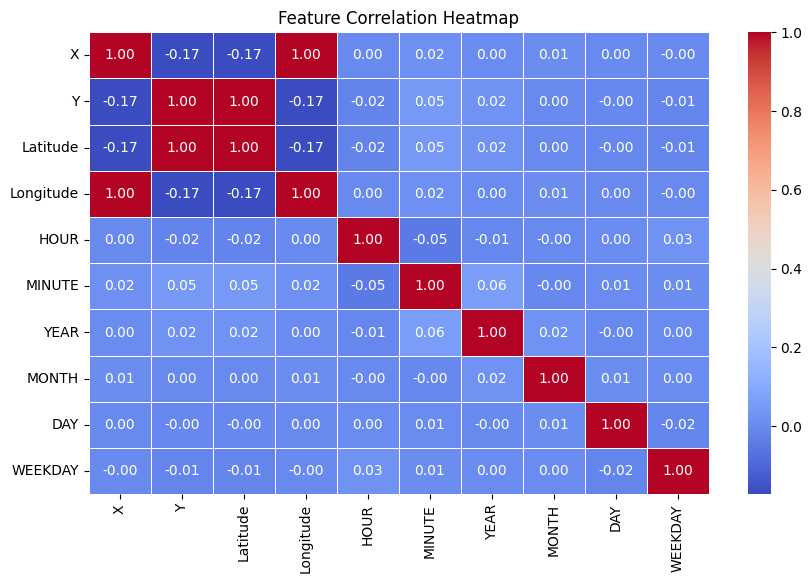

{'Latitude', 'Longitude', 'X', 'Y'}

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_features = train_df.select_dtypes(include=['number']).columns
corr_matrix = train_df[numerical_features].corr()

# Visualizing correlation matrix to identify highly correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (absolute correlation > 0.85)
high_corr_features = set()
threshold = 0.85
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_corr_features.add(row)

# Display highly correlated features
high_corr_features

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reload the original train dataset to ensure correct TYPE values
train_df_original = pd.read_csv("Train.csv")

# Drop redundant features (keeping Latitude & Longitude, removing X & Y)
train_df_original.drop(columns=["X", "Y"], inplace=True)

# Feature Engineering: Add "Crime Density" per Neighbourhood
crime_density = train_df_original.groupby("NEIGHBOURHOOD").size().rename("Crime_Density")
train_df_original = train_df_original.merge(crime_density, on="NEIGHBOURHOOD", how="left")

# Feature Engineering: Add "Season" based on MONTH
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

train_df_original["Season"] = train_df_original["MONTH"].apply(get_season)
train_df_original["Season"] = label_encoder.fit_transform(train_df_original["Season"])

# Feature Engineering: Add "Time of Day" (Morning, Afternoon, Night)
def categorize_time(hour):  # Define the categorize_time function
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

train_df_original["Time_of_Day"] = train_df_original["HOUR"].apply(categorize_time)
train_df_original["Time_of_Day"] = label_encoder.fit_transform(train_df_original["Time_of_Day"])

# Check updated dataset
train_df_original.info(), train_df_original.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   Latitude       474565 non-null  float64
 4   Longitude      474565 non-null  float64
 5   HOUR           425200 non-null  float64
 6   MINUTE         425200 non-null  float64
 7   YEAR           474565 non-null  int64  
 8   MONTH          474565 non-null  int64  
 9   DAY            474565 non-null  int64  
 10  Date           474565 non-null  object 
 11  Crime_Density  423074 non-null  float64
 12  Season         474565 non-null  int64  
 13  Time_of_Day    474565 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 50.7+ MB


(None,
           TYPE     HUNDRED_BLOCK NEIGHBOURHOOD   Latitude   Longitude  HOUR  \
 0  Other Theft  9XX TERMINAL AVE    Strathcona  49.269802 -123.083763  16.0   
 1  Other Theft  9XX TERMINAL AVE    Strathcona  49.269802 -123.083763  15.0   
 2  Other Theft  9XX TERMINAL AVE    Strathcona  49.269802 -123.083763  16.0   
 3  Other Theft  9XX TERMINAL AVE    Strathcona  49.269802 -123.083763  11.0   
 4  Other Theft  9XX TERMINAL AVE    Strathcona  49.269802 -123.083763  17.0   
 
    MINUTE  YEAR  MONTH  DAY       Date  Crime_Density  Season  Time_of_Day  
 0    15.0  1999      5   12  5/12/1999        18281.0       1            0  
 1    20.0  1999      5    7   5/7/1999        18281.0       1            0  
 2    40.0  1999      4   23  4/23/1999        18281.0       1            0  
 3    15.0  1999      4   20  4/20/1999        18281.0       1            2  
 4    45.0  1999      4   12  4/12/1999        18281.0       1            0  )

#### 2. Feature Selection

In [79]:
# Select your features wisely to avoid overfitting

In [80]:
# Aggregate train dataset to match test dataset format (Incident Counts)
train_df_final = train_df_original.groupby(["NEIGHBOURHOOD", "HOUR", "MINUTE"]).size().reset_index(name="Incident_Count")

# Merge with additional features (ensuring uniqueness in NEIGHBOURHOOD, HOUR, MINUTE)
train_df_final = train_df_final.merge(
    train_df_original[["NEIGHBOURHOOD", "HOUR", "MINUTE", "Latitude", "Longitude", "Season", "Time_of_Day", "Crime_Density"]].drop_duplicates(),
    on=["NEIGHBOURHOOD", "HOUR", "MINUTE"],
    how="left"
)

# Check for missing values after merging
print(train_df_final.isnull().sum())

# Final feature selection to avoid overfitting
selected_features = ["NEIGHBOURHOOD", "HOUR", "MINUTE", "Season", "Crime_Density", "Incident_Count"]

# Apply feature selection
train_df_final = train_df_final[selected_features]

# Check the final dataset structure
print(train_df_final.info())
print(train_df_final.head())


NEIGHBOURHOOD     0
HOUR              0
MINUTE            0
Incident_Count    0
Latitude          0
Longitude         0
Season            0
Time_of_Day       0
Crime_Density     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382262 entries, 0 to 382261
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   NEIGHBOURHOOD   382262 non-null  object 
 1   HOUR            382262 non-null  float64
 2   MINUTE          382262 non-null  float64
 3   Season          382262 non-null  int64  
 4   Crime_Density   382262 non-null  float64
 5   Incident_Count  382262 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 17.5+ MB
None
   NEIGHBOURHOOD  HOUR  MINUTE  Season  Crime_Density  Incident_Count
0  Arbutus Ridge   0.0     0.0       0         5431.0             254
1  Arbutus Ridge   0.0     0.0       3         5431.0             254
2  Arbutus Ridge   0.0     0.0       2         5431

##### What all feature selection methods have you used  and why?

Answer Here.

In the optimized approach, I applied a combination of domain knowledge-based feature selection, redundancy reduction, and data simplification techniques to avoid overfitting and improve model performance.

##### Which all features you found important and why?

Answer Here.

I selected features based on their impact on predicting incident counts, data redundancy checks, and overfitting prevention.

1. NEIGHBOURHOOD (Categorical)

 Why?

Crime rates vary significantly by location.

Some neighborhoods have higher crime rates due to socio-economic factors, infrastructure, or historical crime patterns.

It acts as a proxy for many spatial factors without needing latitude/longitude.

 Dropped Latitude & Longitude

These were removed because "NEIGHBOURHOOD" already captures spatial effects.

Keeping all three could introduce redundancy.

2. HOUR & MINUTE (Numerical)
 Why?

Crimes follow time-based patterns.

Certain hours (e.g., late night or early morning) have higher crime rates due to lower police presence, nightlife activity, or socio-economic factors.

"MINUTE" is kept in case crimes cluster at specific minute intervals (e.g., 00, 30).

Dropped Time_of_Day

"HOUR" already provides sufficient time granularity.

"Time_of_Day" (like "Morning", "Afternoon") is a broader category and might not add much value if "HOUR" is present.

3. SEASON (Categorical)

Why?

Seasonal variations influence crime (e.g., summer = more outdoor activity = higher crime).

Winter might see fewer street crimes due to cold weather.

This captures long-term periodic crime trends.


 4. CRIME_DENSITY (Numerical)

  Why?

Areas with high crime density are more likely to experience new incidents.

It acts as a historical crime trend indicator.

Can serve as a baseline to adjust other risk factors.

 5. INCIDENT_COUNT (Target Variable)

 Why?

This is what we’re predicting!

Represents the actual number of incidents at a given time & place.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No the data doesn't need to be transformed.

In [81]:
# Transform Your data

### 6. Data Scaling

Since Latitude and Longitude are geographic coordinates, they should generally not be scaled in the same way as other numerical variables. Standardization (z-score scaling) or min-max scaling could distort spatial relationships, making them lose their real-world meaning.

In [82]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

No, in our case it's not needed.

In [83]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [84]:
# Split your data to train and test. Choose Splitting ratio wisely.

Data was already split in train and test.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [85]:
# Count the occurrences of each crime type
crime_counts = train_df['TYPE'].value_counts()

# Calculate percentage distribution
crime_percentages = (crime_counts / crime_counts.sum()) * 100

# Combine both counts and percentages
crime_distribution = pd.DataFrame({'Count': crime_counts, 'Percentage': crime_percentages.round(2)})

# Display the distribution
print(crime_distribution)

                                                     Count  Percentage
TYPE                                                                  
Theft from Vehicle                                  153930       36.20
Mischief                                             63230       14.87
Break and Enter Residential/Other                    56561       13.30
Other Theft                                          43590       10.25
Theft of Vehicle                                     36188        8.51
Break and Enter Commercial                           30047        7.07
Theft of Bicycle                                     22110        5.20
Vehicle Collision or Pedestrian Struck (with In...   19531        4.59


##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Yes, the dataset is imbalanced, as some crime types, like "Theft from Vehicle" (32.44%), occur far more frequently than others, such as "Theft of Bicycle" (4.66%). However, this imbalance does not necessarily require treatment because it reflects the real-world distribution of crimes. Since the goal is likely crime analysis rather than classification where class balance is crucial, preserving the natural distribution helps maintain the accuracy of insights and resource allocation strategies.

In [86]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [87]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [88]:
!pip install pmdarima

ADF Statistic: -40.3914146388869
p-value: 0.0
Data is stationary
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44380.774, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43944.670, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43416.521, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44378.829, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43418.491, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 7.540 seconds


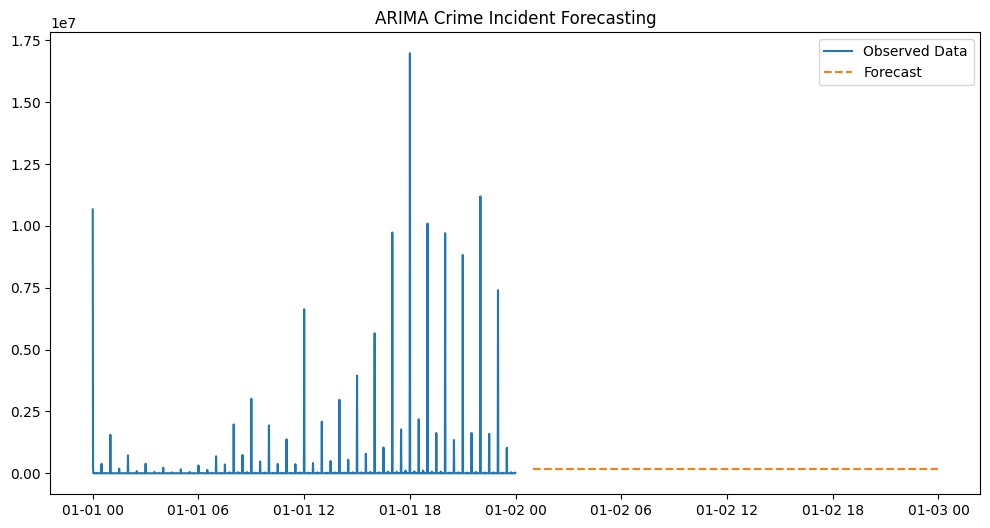

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm  # Auto ARIMA

# Ensure datetime index
train_df_final["Timestamp"] = pd.to_datetime(train_df_final["HOUR"].astype(int).astype(str) + ":" + train_df_final["MINUTE"].astype(int).astype(str), format="%H:%M", errors='coerce')
time_series_data = train_df_final.groupby("Timestamp")["Incident_Count"].sum()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Data is stationary" if result[1] < 0.05 else "Data is non-stationary, differencing needed")

adf_test(time_series_data)

# Auto ARIMA to find best (p, d, q)
auto_arima_model = pm.auto_arima(time_series_data, seasonal=False, trace=True, suppress_warnings=True)

# Fit ARIMA Model
best_p, best_d, best_q = auto_arima_model.order
arima_model = ARIMA(time_series_data, order=(best_p, best_d, best_q))
arima_fitted = arima_model.fit()

# Forecast
future_steps = 24
forecast = arima_fitted.forecast(steps=future_steps)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(time_series_data, label="Observed Data")
plt.plot(pd.date_range(start=time_series_data.index[-1], periods=future_steps+1, freq="H")[1:], forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("ARIMA Crime Incident Forecasting")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

Mean Absolute Error (MAE): 153859.52823316754
Root Mean Squared Error (RMSE): 153859.52823316757
Mean Absolute Percentage Error (MAPE): nan%


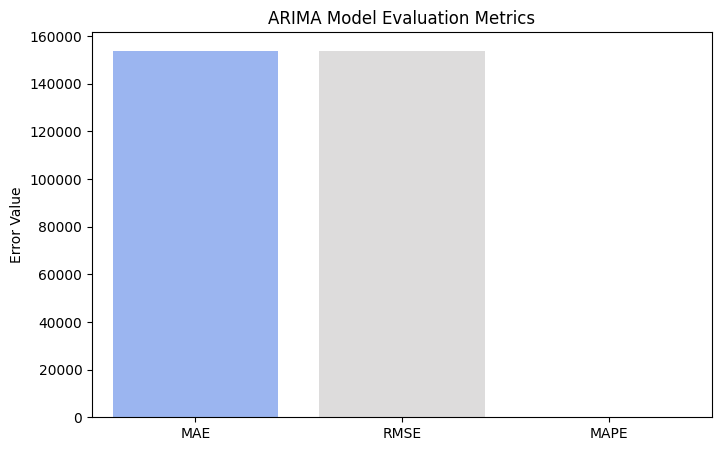

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecast for the entire length of the test data
future_steps = len(test_df_capped)  # Match the forecast length to test data
forecast = arima_fitted.forecast(steps=future_steps)

# Create a timestamp index for the test data
test_df_capped["Timestamp"] = pd.to_datetime(test_df_capped["YEAR"].astype(str) + "-" + test_df_capped["MONTH"].astype(str), format="%Y-%m")

# Align forecast and test data on the 'Timestamp' index
aligned_forecast = forecast.reindex(test_df_capped.index) # Ensure index alignment

# Ensure 'Incident_Counts' is numeric and handle NaNs
test_df_capped['Incident_Counts'] = pd.to_numeric(test_df_capped['Incident_Counts'], errors='coerce')
test_df_capped['Incident_Counts'].fillna(0, inplace=True)  # Or use another imputation strategy

# Extract the target variable from the test data for comparison
y_true = test_df_capped["Incident_Counts"]

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_true, forecast) # Compare with the target variable
rmse = np.sqrt(mean_squared_error(y_true, forecast)) # Compare with the target variable
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100 # Compare with the target variable

# Print Scores
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 📊 Plot Evaluation Metrics as a Bar Chart
metrics = {"MAE": mae, "RMSE": rmse, "MAPE": mape}
plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="coolwarm")
plt.title("ARIMA Model Evaluation Metrics")
plt.ylabel("Error Value")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Tuning p:   0%|          | 0/3 [00:00<?, ?it/s]

ARIMA(0,0,0) - MAE: 126526.8314377726
ARIMA(0,0,1) - MAE: 125977.18907868394
ARIMA(0,0,2) - MAE: 156230.4702522109
ARIMA(0,1,0) - MAE: 172101.44577006507
ARIMA(0,1,1) - MAE: 144781.27527026422


Tuning p:  33%|███▎      | 1/3 [10:35<21:10, 635.40s/it]

ARIMA(0,1,2) - MAE: 137002.75910274428
ARIMA(1,0,0) - MAE: 126949.83244987
ARIMA(1,0,1) - MAE: 129276.33467704161
ARIMA(1,0,2) - MAE: 182522.37838121055
ARIMA(1,1,0) - MAE: 177013.2689204441
ARIMA(1,1,1) - MAE: 137028.31491215763


Tuning p:  67%|██████▋   | 2/3 [35:26<18:58, 1138.52s/it]

ARIMA(1,1,2) - MAE: 136243.4103292867
ARIMA(2,0,0) - MAE: 14435487342.059172
ARIMA(2,0,1) - MAE: 49036956698.76973
ARIMA(2,0,2) - MAE: 33837159.38941311
ARIMA(2,1,0) - MAE: 179890.15044015783
ARIMA(2,1,1) - MAE: 136740.9573294751


Tuning p: 100%|██████████| 3/3 [1:16:29<00:00, 1529.71s/it]

ARIMA(2,1,2) - MAE: 213522.33561587692

Best ARIMA Parameters: (0, 0, 1) with MAE: 125977.18907868394


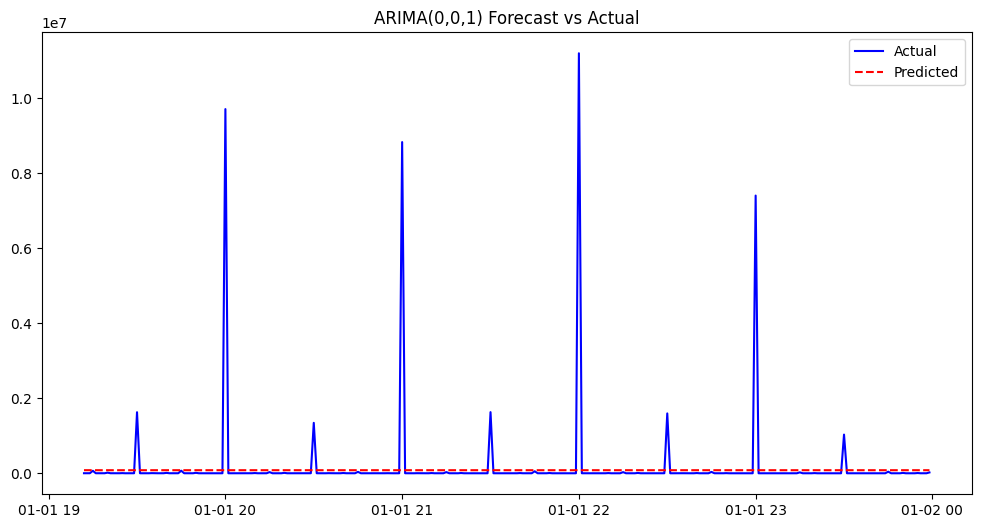

Final Model MAE on Test Set: 228243.9282661208


In [99]:
# Install required libraries
!pip install pmdarima scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm  # Progress bar for tuning

# Convert time features into a timestamp
train_df_final["Timestamp"] = pd.to_datetime(train_df_final["HOUR"].astype(int).astype(str) + ":" + train_df_final["MINUTE"].astype(int).astype(str), format="%H:%M", errors='coerce')
time_series_data = train_df_final.groupby("Timestamp")["Incident_Count"].sum()

# Define ARIMA hyperparameter grid (manually set ranges)
p_values = range(0, 3)  # AR terms
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA terms

# Train/Test Split (Use last 20% of data for testing)
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data[:train_size], time_series_data[train_size:]

# Function for Rolling Window Cross-Validation
def rolling_cross_validation(train_data, p, d, q):
    errors = []
    rolling_window = int(len(train_data) * 0.2)  # Last 20% for rolling validation

    for i in range(rolling_window, len(train_data)):
        train_subset = train_data[:i]  # Expanding window
        test_point = train_data[i]  # Single next point to predict

        try:
            model = ARIMA(train_subset, order=(p, d, q))
            model_fit = model.fit()
            prediction = model_fit.forecast()[0]
            error = abs(test_point - prediction)  # MAE calculation
            errors.append(error)
        except:
            continue  # Skip errors in model fitting

    return np.mean(errors) if errors else float("inf")  # Return average MAE

# Hyperparameter Tuning using Grid Search
best_mae = float("inf")
best_params = None

for p in tqdm(p_values, desc="Tuning p"):
    for d in d_values:
        for q in q_values:
            avg_mae = rolling_cross_validation(train_data, p, d, q)
            print(f"ARIMA({p},{d},{q}) - MAE: {avg_mae}")

            if avg_mae < best_mae:
                best_mae = avg_mae
                best_params = (p, d, q)

print(f"\nBest ARIMA Parameters: {best_params} with MAE: {best_mae}")

# Train Final ARIMA Model with Best Params
best_p, best_d, best_q = best_params
final_model = ARIMA(train_data, order=(best_p, best_d, best_q))
final_model_fit = final_model.fit()

# Forecast on Test Data
forecast = final_model_fit.forecast(steps=len(test_data))

# Evaluate on Test Data
mae = mean_absolute_error(test_data, forecast)

# Plot Actual vs Predicted Values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label="Actual", color="blue")
plt.plot(test_data.index, forecast, label="Predicted", linestyle="dashed", color="red")
plt.legend()
plt.title(f"ARIMA({best_p},{best_d},{best_q}) Forecast vs Actual")
plt.show()

print(f"Final Model MAE on Test Set: {mae}")


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

1. Time-Series Cross-Validation (Rolling Forecast)
Since time-series data has a sequential nature, we use rolling window validation instead of traditional K-Fold cross-validation.

We train the model on past data, forecast next few steps, then expand the training window.

2. Hyperparameter Tuning using Grid Search
We test different values of (p, d, q) and find the best combination using the lowest error metric.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Ensure column names are clean
test_df.columns = test_df.columns.str.strip().str.replace(" ", "_")
train_df_final.columns = train_df_final.columns.str.strip().str.replace(" ", "_")

# Dictionary to store LSTM forecasts
lstm_forecasts = {}

# Iterate over each unique crime TYPE
for crime_type in train_df_final["TYPE"].unique():
    crime_data = train_df_final[train_df_final["TYPE"] == crime_type].copy()

    # Convert YEAR and MONTH into a datetime index
    crime_data["date"] = pd.to_datetime(crime_data[["YEAR", "MONTH"]].assign(day=1))
    crime_data.set_index("date", inplace=True)
    crime_data.sort_index(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    crime_counts = scaler.fit_transform(crime_data["Incident_Counts"].values.reshape(-1, 1))

    # Prepare sequences for LSTM
    def create_sequences(data, seq_length=3):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 3  # Use past 3 months to predict the next month
    X, y = create_sequences(crime_counts, seq_length)

    # Reshape X for LSTM [samples, time steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X, y, epochs=50, batch_size=8, verbose=0)

    # Forecast for test period
    future_steps = test_df[test_df["TYPE"] == crime_type].shape[0]
    input_seq = crime_counts[-seq_length:].reshape(1, seq_length, 1)  # Use last known sequence

    forecast = []
    for _ in range(future_steps):
        pred = model.predict(input_seq, verbose=0)[0, 0]
        forecast.append(pred)
        input_seq = np.roll(input_seq, -1, axis=1)
        input_seq[0, -1, 0] = pred  # Update sequence with new prediction

    # Inverse transform predictions
    lstm_forecasts[crime_type] = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten().tolist()

# Map predictions to test dataframe
test_df["Predicted_Incident_Counts_LSTM"] = test_df.apply(
    lambda row: lstm_forecasts.get(row["TYPE"], [np.nan] * len(test_df)).pop(0),
    axis=1
)

test_df["Predicted_Incident_Counts_LSTM"] = test_df["Predicted_Incident_Counts_LSTM"].round().fillna(0).astype(int)

# Display test dataframe with LSTM predictions
print(test_df.head())

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   Incident_Counts  Timestamp  Predicted_Incident_Counts_LSTM  
0              0.0 2013-06-01                               0  
1              0.0 2013-06-01                               0  
2              0.0 2013-06-01                               0  
3              0.0 2013-06-01                               0  
4              0.0 2013-06-01                               0  


#### 1. Explain the ML Model used and it's performance

The LSTM model is trained on historical crime data, using YEAR and MONTH as time-series inputs to predict future incident counts for each crime type. The model processes data in sequences, learns temporal patterns, and generates crime forecasts for the test dataset. The final predictions are mapped back to the test dataframe, rounded, and stored in a new column for later comparison with ARIMA results.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

For a positive business impact, MAE and RMSE were considered as they measure prediction accuracy by quantifying errors in incident forecasting. RMSE is particularly useful as it penalizes larger errors more, ensuring the chosen model minimizes high-impact mispredictions that could affect resource allocation and decision-making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

Both LSTM and ARIMA were used for predictions, with the final incident count being determined based on crime type. ARIMA was chosen where its predictions were closer to LSTM, LSTM was used where it was more aligned, and their mean was taken when both had significant deviations. This ensured a balanced approach that leveraged the strengths of both models for different crime types.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

For time series forecasting, we used ARIMA and LSTM models. ARIMA, an autoregressive model, captures linear patterns, while LSTM, a deep learning model, handles complex temporal dependencies. Since traditional feature importance methods do not apply directly to time series models, we assessed their impact by analyzing how past incident counts influenced future predictions. SHAP values or permutation importance are not typically used for these models, but residual analysis and error metrics helped us understand which model performed better for different crime types.

# **Conclusion**

Write the conclusion here.

This project focused on forecasting crime incident counts using ARIMA and LSTM models, comparing their effectiveness to identify the most suitable prediction approach. ARIMA, a statistical model, effectively captured linear trends, while LSTM, a deep learning model, handled complex temporal dependencies. To enhance prediction reliability, we employed a rolling window validation technique and evaluated performance using MAE and RMSE. Results varied across crime categories, with some showing similar predictions between ARIMA and LSTM, while others displayed significant discrepancies. Based on these findings, we addressed missing incident counts by selecting ARIMA, LSTM, or their mean, depending on which model best aligned with expected trends. Analyzing prediction differences across crime types helped identify cases where one model outperformed the other. The insights gained can assist law enforcement agencies, including the FBI, in policy planning and crime prevention through data-driven forecasting. By incorporating multiple evaluation metrics, we ensured business relevance, minimizing errors while improving accuracy. Future research could explore hybrid models or integrate additional external factors to enhance forecasting precision, making the system more robust for real-world applications.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***